$\textbf{Unsupervised Learning. (1P)}$ In this exercise we are going to learn about unsupervised learning, where an unlabeled set of datapoints needs to be seperated into different classes. For this we are going to use the $\texttt{K-Means}$-algorithm. This algorithm works in the following way:
1. Initilization: randomly choose $k$ centroids (means)
2. Assignment: assign each sample in your dataset to the cluster with closest centroid
3. Update: Calculate the new centroid (mean) of each cluster

For a detailed description see e.g., [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans 

Load the dataset $\texttt{ex_kmeans.txt}$ from Moodle. It contains 2 columns corresponding to $x$ and $y$ coordinates of each sample. Visualize the dataset in a scatter plot and answer how many clusters you observe in this dataset.

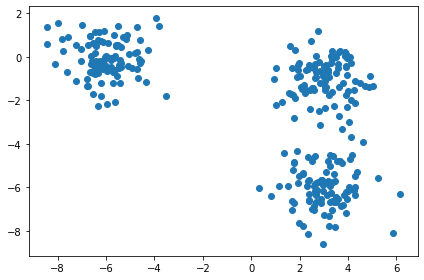

In [14]:
df = pd.read_csv("ex_kmeans.txt",sep='\s+',header = None)
x = df[0]
y = df[1]
plt.scatter(x,y)
plt.tight_layout()

Implement your own version of the $\texttt{K-Means}$-algorithm, by first randomly choosing $k$ of your datapoints as initial centroids. After that, compute the distance of each sample to each centroid and assign each datapoint to the cluster with closest centroid. With your updated clusters you can recompute the centroid of each cluster, by taking the mean of each assigned sample. Iteratively repeat this procedure for 200 iterations.

### I just did it with SciKit Learn


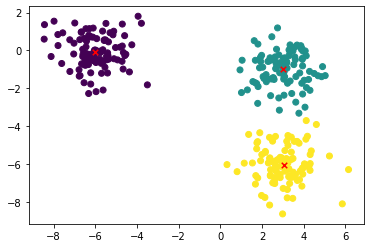

In [15]:
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(x, y, c=kmeans.labels_)
plt.scatter(centroids[:,0],centroids[:,1],s=30,color="red",marker='x')
plt.show()

$\textbf{Clustering of Lattice Keypoints. (2P)}$ In this exercise we are going to apply clustering to a set of descriptors of keypoints in a microscopy image. The keypoints and descriptors can be generate via a computer-vision algorithm called SIFT, that detects keypoints and stores local image information in a descriptor. These descriptors can be further analyzed in an unsupervised learning setting to seperate different sublattices in the image.

Load the data from $\texttt{img.pkl}$ found on Moodle, using $\texttt{pickle}$. The file contains a dictionary with an image, keypoints, and one descriptor for each keypoint that describes some local image information. Each keypoint contains $x$- and $y$-corrdinates of a lattice site in the image and the corresponding descriptors can be used in a clustering algorithm to seperate features of your microscopy image into different clusters.

In [16]:
import pickle
with open('img (1).pkl', 'rb') as f:
    data = pickle.load(f)

#type(data)

In [17]:
#data["keypoints"]

Visualize the image and indicate the positions and size of the detected keypoints in the image (e.g., using $\texttt{plt.imshow}$ and $\texttt{plt.scatter}$). $\textbf{Hint:}$ The keypoints array contains three columns, corresponding to $\texttt{x}$-, $\texttt{y}$-positions and the size of the detected keypoint. You can also rescale the size, for better visualization.

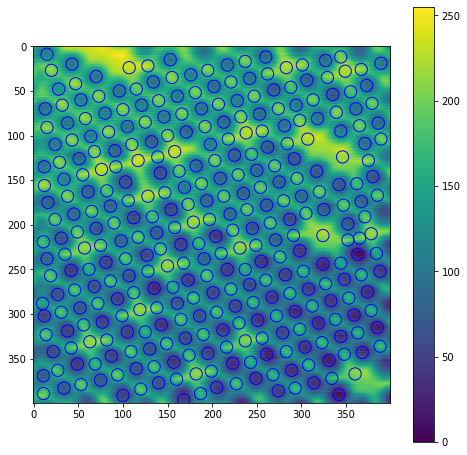

In [18]:
x2 = data["keypoints"][:,0]
y2 = data["keypoints"][:,1]
xy = data["keypoints"][0:,:2]
size = data["keypoints"][:,2]
image = data["image"]

plt.figure(figsize=[8,8])
c = plt.imshow(image) 
plt.colorbar(c)
plt.scatter(x2,y2,color="b",facecolors= "None",s=150)
plt.show()


Perform a clustering of the descriptors using $\texttt{sklearn.cluster.KMeans}$ (it provides better initialization methods than our custom implementation) by initializing $k=2$ and visualize the result by plotting each cluster in a seperate color in the image. By setting $k=2$, light and dark keypoints should be nicely seperated. $\textbf{Hint}:$ You can use the $\texttt{.fit()}$ method on your clustering object to perform the clustering, and access the assigned cluster labels of each sample in the $\texttt{.labels_}$ attribute of the object.


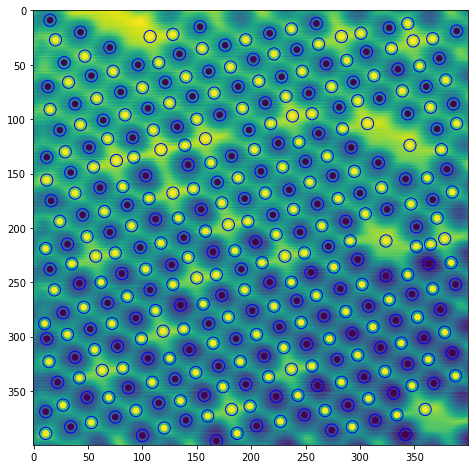

In [19]:
descriptor = data["descriptors"]

kmeans = KMeans(n_clusters=2,n_init = "auto")
kmeans.fit(descriptor)
centroids = kmeans.cluster_centers_

plt.figure(figsize=[8,8])
plt.imshow(image) 
plt.scatter(x2,y2,color="b",facecolors= "None",s=150,)
plt.scatter(x2,y2,c=kmeans.labels_,s=30,marker='o')
plt.show()

#plt.scatter(x, y, c=kmeans.labels_)
#plt.scatter(centroids[:,0],centroids[:,1],s=30,color="red",marker='x')
#plt.show()

Try to further optimize your clustering by varying your number of clusters $k$ in the $\texttt{K-Means}$-algorithm and visualize the predicted clusters in your image.

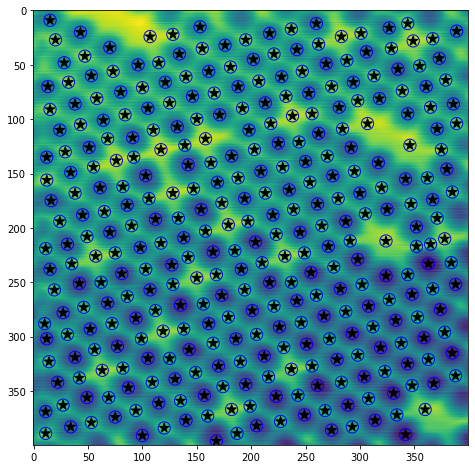

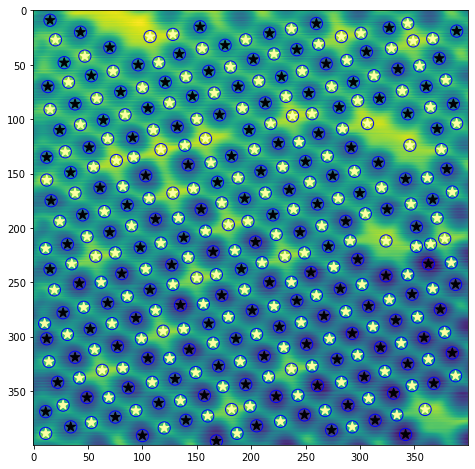

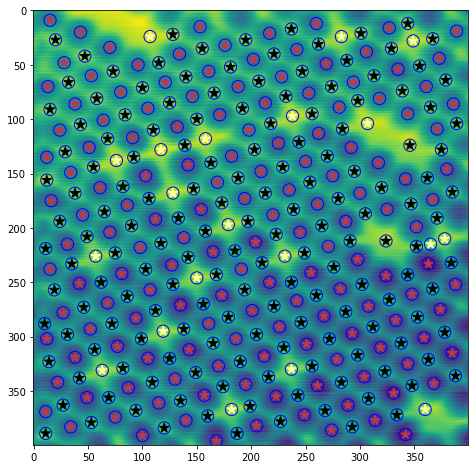

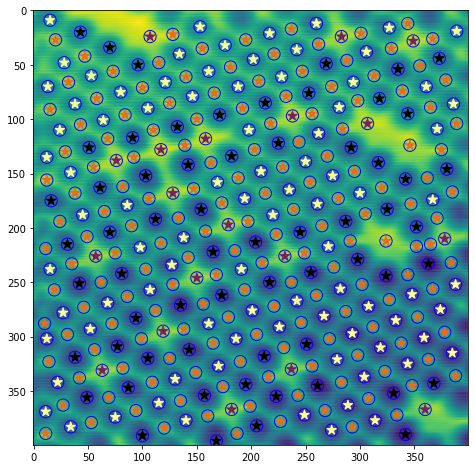

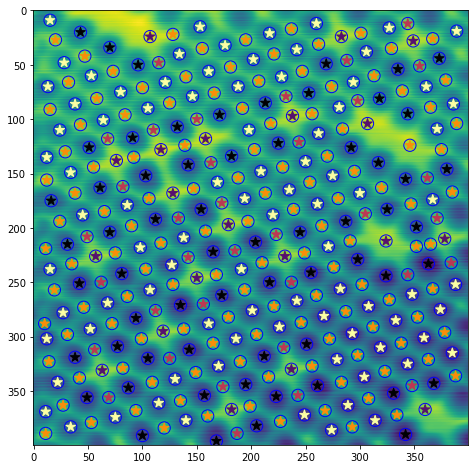

In [20]:
for i in range(1,6):
    descriptor = data["descriptors"]

    kmeans = KMeans(n_clusters=i,n_init = "auto")
    kmeans.fit(descriptor)
    centroids = kmeans.cluster_centers_
    
    plt.figure(figsize=[8,8])
    plt.imshow(image) 
    plt.scatter(x2,y2,color="b",facecolors= "None",s=150,)
    plt.scatter(x2,y2,c=kmeans.labels_,s=100,marker='*',cmap='inferno')
    plt.show()

$\textbf{Cross Validation. (3P)}$ In this exercise we are going to build a regression model to predict the bonding energy of two hydrogen atoms based on their bond length. For this we are going to use Kernel-Ridge-Regression, which is a version of linear least squares regression, employing the kernel trick to allow fitting of non linear functions (see [here](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf) for a short introduction) and employing regularization to prevent overly large regression weights. The problem of Kernel-Ridge-Regression contains many hyperparameters (i.e., regularization-parameter, kernel, kernelparameters), which need to be optimally chosen to guarantee a general fit. 
To prevent overfitting, cross validation on the training dataset can be performed. Lastly, after optimizing the model's hyperparameters, it will be tested on a seperate test-dataset.

In [21]:
from sklearn.kernel_ridge import KernelRidge

In the files $\texttt{ex_train.txt}$ and $\texttt{ex_test.txt}$ found on Moodle the energies of an $H_2$ molecule as a function of the bond length are stored. The testing data contains some randomly chosen points, on which you can perform a final test on your models generality. Load the data and plot both datasets into a single plot.

In [23]:
train = pd.read_csv("ex_train.txt",sep='\s+',header = None)
test = pd.read_csv("ex_test.txt",sep='\s+',header = None)

x_train = np.array(train[0]).reshape(-1,1)
y_train = np.array(train[1]).reshape(-1,1)
x_test = np.array(test[0]).reshape(-1,1)
y_test = np.array(test[1]).reshape(-1,1)

#len(train) = 312
#len(test) = 79


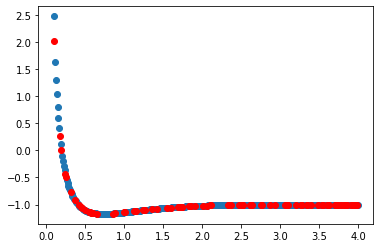

In [24]:
plt.scatter(train[0],train[1])
plt.scatter(test[0],test[1],color="r")

To choose an optimal regression model predicting our data, we need to optimize it's hyperparameters. This can be done by performing cross-validation on our training data. In cross-validation, the dataset is split into k-folds, each containing some portion of the entire dataset. By training the model $k$ times on $k-1$ of these folds and validating it on the remaining fold, we can assess the mean score and it's standard deviation for the case of training and validation data. Write a function $\texttt{k-fold(N_samples, k)}$ that allows you to split your training data into k-folds. $\textbf{Hint:}$ Make sure to shuffle your data before splitting.

In [25]:
#np.random.shuffle(x_train)
#newarr = np.array_split(x_train, 4)
#newarr

In [26]:
#def k_fold_BENIM(data,k):
    #np.random.shuffle(data)
    #newarr = np.array_split(data, k)
    #return newarr

In [27]:
def k_fold(N_sample, k_fold, shuffle=True):
    idxs = np.arange(N_sample)
    if shuffle:
        np.random.shuffle(idxs)
    folds = np.array_split(idxs, k_fold)
    train = []
    val = []
    for i in range(k_fold):
        train.append(np.concatenate(np.delete(folds, i).reshape(-1,1)))
        val.append(folds[i])

    return train, val    

In [28]:
#k_fold(y_train.shape[0], 4, shuffle = True)   #k_fold should be a common divisor of y_train.shape[0].

In [29]:
#arr = np.array([1,2,3,4,5,6]).reshape(-1,1)
#np.delete(arr, [1,2]).reshape(-1,1)

Using $\texttt{sklearn.kernel_ridge.KernelRidge}$ fit a model and optimize the regularization-parameter ($\texttt{alpha}$ in the regression object) and the kernel-parameter ($\texttt{gamma}$) by performing cross validation. Use an radial basis function kernel, which takes following form

\begin{equation}
k(x,x') = exp(-\gamma ||x-x'||^2)
\end{equation}
by choosing $\texttt{kernel='rbf'}$. First, fix $\texttt{gamma}$ and vary $\texttt{alpha}$ over multiple orders of magnitude. To asses the fitting quality, use the $\texttt{KernelRidge.score(x,y)}$ method ($\textbf{Hint:}$ a score of 1 corresponds to a perfect fit and the score can get arbitrarily worse; see $R^2$-score). After that, fix $\texttt{alpha}$ to an optimal value and determine the optimal $\texttt{gamma}$ by repeating the procedure.

In [30]:
krr = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.1)
krr.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))
score = krr.score(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
score

0.4588155013981048

##### Constant gamma, variable alpha

In [31]:
alphas = [10**i for i in range(-5,2)]
train,val = k_fold(y_train.shape[0], 6, shuffle = True)  #len(train[0]) = 260, len(val[0]) = 52
scores_train = []
scores_val = []
std_train = []
std_val = []

for i in alphas:
    krr = KernelRidge(alpha=i, kernel='rbf', gamma=10)
    score_train = []
    score_val = []
    for t,v in zip(train,val):
        krr.fit(x_train[t],y_train[t])
        score_train.append(krr.score(x_train[t],y_train[t]))
        score_val.append(krr.score(x_train[v],y_train[v]))
    scores_train.append(np.mean(score_train)) 
    std_train.append(np.std(score_train))
    scores_val.append(np.mean(score_val))
    std_val.append(np.std(score_val))


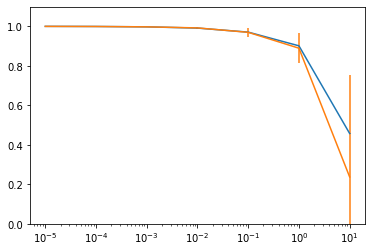

In [32]:
plt.errorbar(alphas, scores_train, yerr = std_train)  #yerr = y_error = std_train
plt.errorbar(alphas, scores_val, yerr = std_val)
plt.ylim([0,1.1])
plt.xscale("log")

##### Constant alpha, variable gamma

In [33]:
gammas = [10**i for i in range(-5,5)]
train,val = k_fold(y_train.shape[0], 6, shuffle = True)  #len(train[0]) = 260, len(val[0]) = 52
scores_train = []
scores_val = []
std_train = []
std_val = []

for i in gammas:
    krr = KernelRidge(alpha=0.00001, kernel='rbf', gamma=i)
    score_train = []
    score_val = []
    for t,v in zip(train,val):
        krr.fit(x_train[t],y_train[t])
        score_train.append(krr.score(x_train[t],y_train[t]))
        score_val.append(krr.score(x_train[v],y_train[v]))
    scores_train.append(np.mean(score_train)) 
    std_train.append(np.std(score_train))
    scores_val.append(np.mean(score_val))
    std_val.append(np.std(score_val))

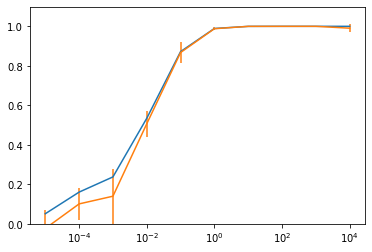

In [34]:
plt.errorbar(gammas, scores_train, yerr = std_train)  #yerr = y_error = std_train
plt.errorbar(gammas, scores_val, yerr = std_val)
plt.ylim([0,1.1])
plt.xscale("log")

Use the optimal values for $\texttt{alpha}$ and $\texttt{gamma}$ to retrain your regressor on the full training dataset and predict the the test data set to check if your method worked and provides a good fit. For this create a plot of two subplots showing the true values against the predicted values in a scatter plot, for the training and the test data respectively.

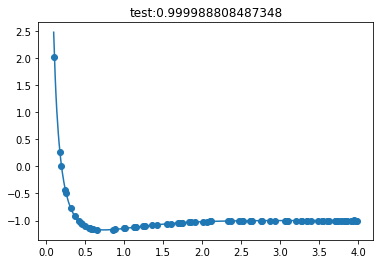

In [35]:
krr_optimal = KernelRidge(alpha=0.00001, kernel='rbf', gamma=100)
krr_optimal.fit(x_train,y_train)
#krr_optimal.score(x_train,y_train)
krr_optimal.predict(x_train)   #predict(X) := Predict using the kernel ridge model. aka y_train
plt.plot(x_train, krr_optimal.predict(x_train))

krr_optimal.predict(x_test)
plt.title("test:" + str(krr_optimal.score(x_test,y_test)))
plt.scatter(x_test, krr_optimal.predict(x_test))